In [16]:
import pandas as pd
Reading_data_transaction = pd.read_csv('transaction_data.csv')
Reading_data_transaction_demo = pd.read_csv('hh_demographic.csv')
Reading_data_transaction_prod = pd.read_csv('product.csv')
print(Reading_data_transaction_demo.head())
print(Reading_data_transaction_prod.head())
print(Reading_data_transaction.info()) #Gives the information about the datatypes and missing values
print(Reading_data_transaction.head()) #Top 5 rows view of the data

  AGE_DESC MARITAL_STATUS_CODE INCOME_DESC HOMEOWNER_DESC      HH_COMP_DESC  \
0      65+                   A      35-49K      Homeowner  2 Adults No Kids   
1    45-54                   A      50-74K      Homeowner  2 Adults No Kids   
2    25-34                   U      25-34K        Unknown     2 Adults Kids   
3    25-34                   U      75-99K      Homeowner     2 Adults Kids   
4    45-54                   B      50-74K      Homeowner     Single Female   

  HOUSEHOLD_SIZE_DESC KID_CATEGORY_DESC  household_key  
0                   2      None/Unknown              1  
1                   2      None/Unknown              7  
2                   3                 1              8  
3                   4                 2             13  
4                   1      None/Unknown             16  
   PRODUCT_ID  MANUFACTURER    DEPARTMENT     BRAND            COMMODITY_DESC  \
0       25671             2       GROCERY  National                  FRZN ICE   
1       26081        

In [13]:
Total_sales_per_basket = Reading_data_transaction.groupby('BASKET_ID')['SALES_VALUE'].sum()
print(avg_sales_per_basket)
'''It is important to know how much each household is spending per transaction or per Basket, as we can later on build upon this to more granular analysis by demographics and product data'''


BASKET_ID
26984851472     5.91
26984851516    12.43
26984896261    11.37
26984905972     2.55
26984945254     3.53
               ...  
42302712006     9.78
42302712189    33.64
42302712298    40.70
42305362497     5.61
42305362535    32.32
Name: SALES_VALUE, Length: 276484, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualising the distribution of sales values
sns.histplot(Reading_data_transaction['SALES_VALUE'], kde=True)
plt.title('Distribution of Sales Value')
plt.show()


In [5]:
demographic_df = pd.read_csv('hh_demographic.csv')
merged = demographic_df.merge(Reading_data_transaction, on='household_key') 

spend_by_income = merged.groupby('INCOME_DESC')[ 'SALES_VALUE'].sum()
print(spend_by_income)
'''This is like a join in sql, so we can merge 2 datasets based on the household_key column. 
Then we added all the sales values of each household based on the income column'''


INCOME_DESC
100-124K      201543.17
125-149K      300658.10
15-24K        303187.20
150-174K      251845.22
175-199K       94033.09
200-249K       28632.43
25-34K        380231.38
250K+         118688.90
35-49K        825945.47
50-74K       1094852.10
75-99K        558962.90
Under 15K     339136.30
Name: SALES_VALUE, dtype: float64


In [8]:
household_counts = merged.groupby('INCOME_DESC')['household_key'].nunique()
print((household_counts))
'''No of unique household_keys we have got the demographic data for. this is important to find out the most valuable customers'''

INCOME_DESC
100-124K      34
125-149K      38
15-24K        74
150-174K      30
175-199K      11
200-249K       5
25-34K        77
250K+         11
35-49K       172
50-74K       192
75-99K        96
Under 15K     61
Name: household_key, dtype: int64


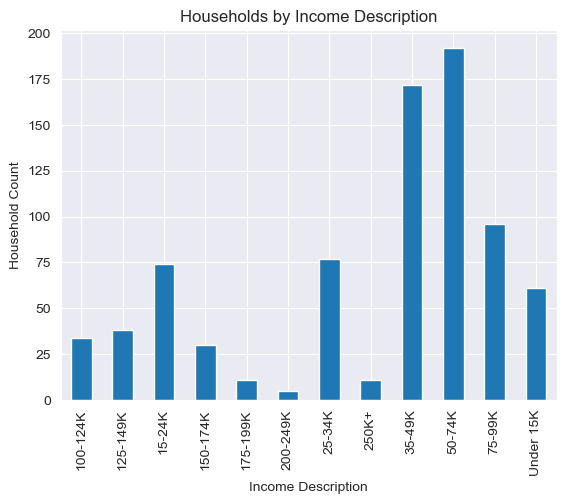

In [14]:
import matplotlib.pyplot as plt

household_counts.plot(kind='bar')
plt.title('Households by Income Description')
plt.xlabel('Income Description')
plt.ylabel('Household Count')
plt.show()
#This gives us a bar graph that displays the household_count by income description

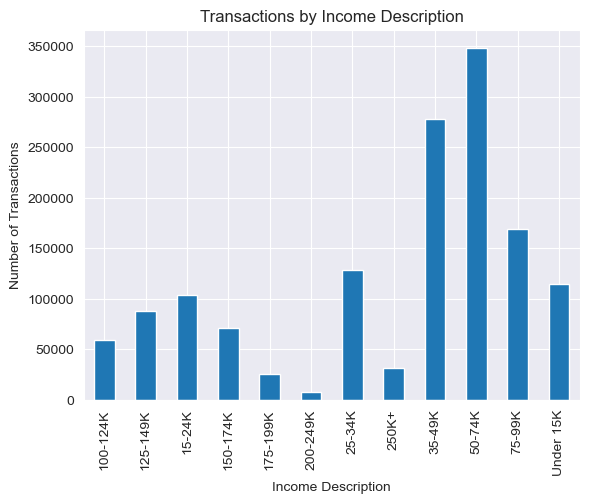

In [11]:
# Count transactions by income description
txns_by_income = merged.groupby('INCOME_DESC')['household_key'].count() 

# Plot bar chart
import matplotlib.pyplot as plt
txns_by_income.plot(kind='bar')
plt.title('Transactions by Income Description')
plt.xlabel('Income Description') 
plt.ylabel('Number of Transactions')
plt.show()


In [18]:
merged = Reading_data_transaction.merge(Reading_data_transaction_prod, on='PRODUCT_ID')


In [19]:
sales_by_category = merged.groupby('COMMODITY_DESC')['SALES_VALUE'].sum()


<Axes: xlabel='COMMODITY_DESC'>

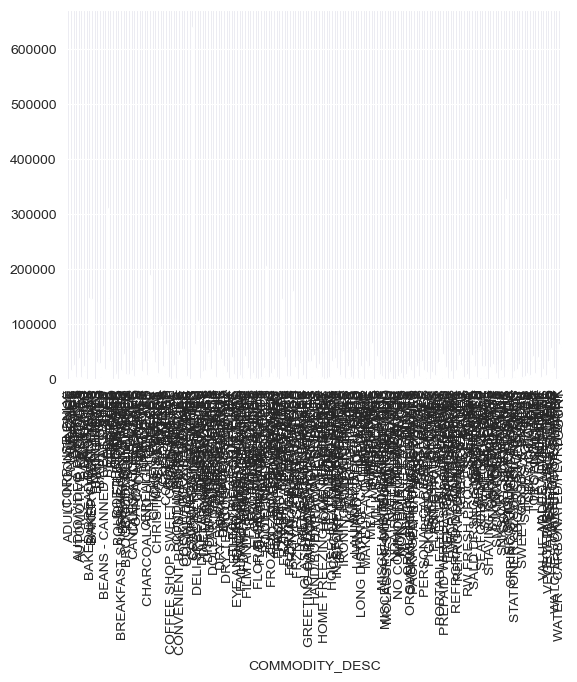

In [20]:
sales_by_category.plot(kind='bar')


In [30]:
top5 = (merged
   .groupby('DEPARTMENT')['SALES_VALUE']
   .sum()
   .sort_values(ascending=False)
   .head(5)
)


In [31]:
print(top5)

DEPARTMENT
GROCERY      4093814.14
DRUG GM      1055358.03
PRODUCE       557452.11
MEAT          548786.81
KIOSK-GAS     544222.28
Name: SALES_VALUE, dtype: float64
